In [27]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import stats
from sklearn import model_selection

In [28]:
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
X_all = data
X_train , X_test , y_train , y_test =model_selection . train_test_split ( digits.data , digits.target , test_size = 0.4 , random_state = 0)

### Function for plotting the images (From exercise01b)

In [29]:
def show1(img):
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "nearest") # also try interpolation =" bicubic "
    plt.show()
def show2(img):  
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "bicubic") # also try interpolation =" bicubic "
    plt.show()

### Choose the two wanted values

In [30]:
value1 = 3
value2 = 7

### Select only chosen values

In [31]:
def Choose_two_values(value1, value2):
    X_trainAB= []
    y_trainAB= []
    for i in range(len(X_train)):
        if y_train[i] ==value1 or y_train[i] == value2:
            X_trainAB.append(X_train[i])
            y_trainAB.append(y_train[i])
    X_trainAB = np.array(X_trainAB)
    y_trainAB = np.array(y_trainAB)
    return X_trainAB, y_trainAB

In [32]:
X_trainAB, y_trainAB = Choose_two_values(value1, value2)

In [33]:
def fit_qda(training_features, training_labels, value1, value2):
    x1_mean = np.mean(training_features[value1 == training_labels],axis = 0)
    x2_mean = np.mean(training_features[value2 == training_labels],axis = 0)
    D = len(x1_mean) #For knowing the dimension of the features
    mu = np.stack((x1_mean, x2_mean), axis = 0)
    scatter_matrix1 = np.zeros((D,D)) #start arrays of zero
    scatter_matrix2 = np.zeros((D,D))
    for i in range(len(training_features)):
        x = training_features[i, :] - x1_mean
        for k in range(D):
            for m in range(D):
                scatter_matrix1[k,m] = scatter_matrix1[k,m]+  x[k]*x[m] #Matrix multiplication and sum
    for i in range(len(training_features)):
        x = training_features[i, :] - x2_mean
        for k in range(D):
            for m in range(D):
                scatter_matrix2[k,m] = scatter_matrix2[k,m]+  x[k]*x[m]
    covmat1 = scatter_matrix1/(len(training_features))
    covmat2 = scatter_matrix2/(len(training_features))
    covmat = np.stack((covmat1, covmat2),axis = 0)
    p1 = len(training_features[value1 == training_labels])/len(training_features)
    p2 = len(training_features[value2 == training_labels])/len(training_features)
    p = np.array([p1,p2])
    return mu, covmat,p

In [34]:
mu_qda, covmat_qda,p_qda = fit_qda(X_trainAB, y_trainAB, value1 ,value2)

In [35]:
def image_generator(mu, covmat, value):
    index = 0
    if value == value2:
        index = 1
    image = np.random.multivariate_normal(mu_qda[index], covmat_qda[index])

    image[image <0.5]= 0

    image = np.around(image, decimals=0)

    image = np.reshape(image,(8,8))
    return image

image #1


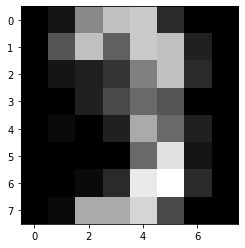

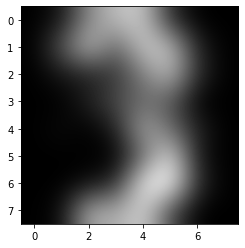

image #2


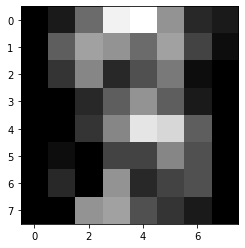

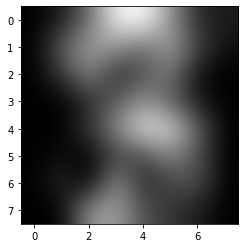

image #3


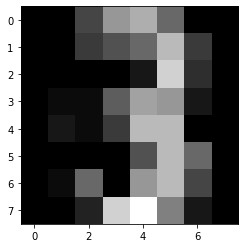

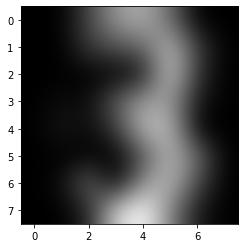

image #4


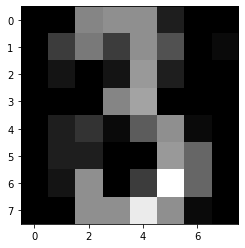

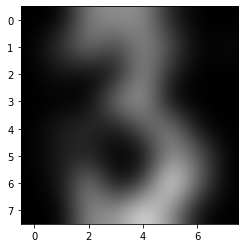

image #5


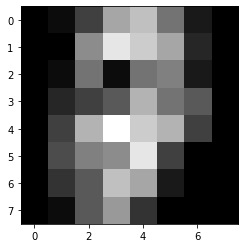

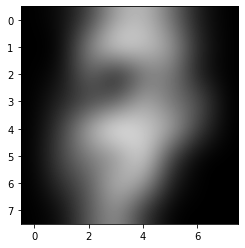

image #6


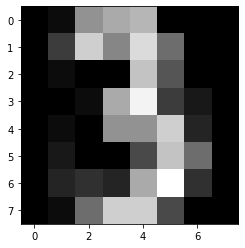

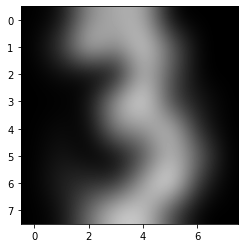

image #7


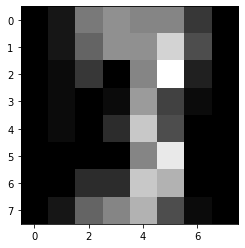

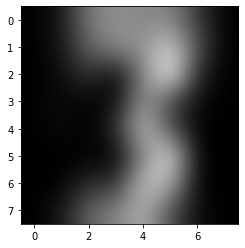

image #8


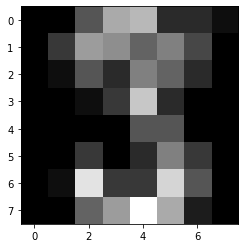

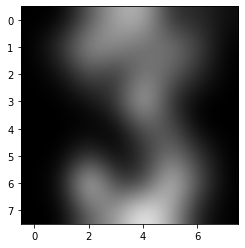

In [36]:
number_of_images = 8
for i in range(number_of_images):
    image1 = image_generator(mu_qda, covmat_qda, value1)
    print("image #" + str(i+1))
    show1(image1)
    show2(image1)

image #1


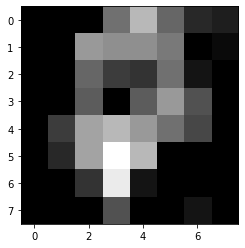

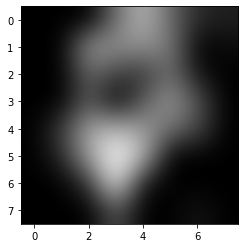

image #2


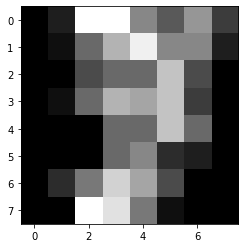

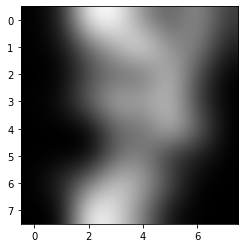

image #3


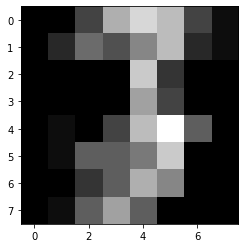

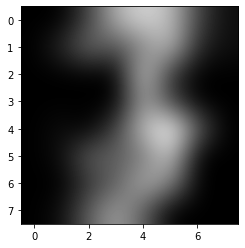

image #4


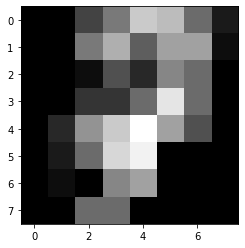

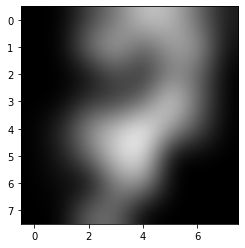

image #5


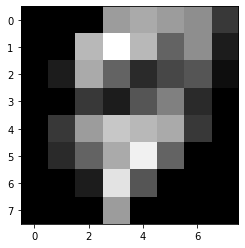

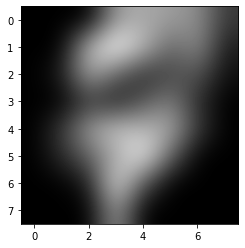

image #6


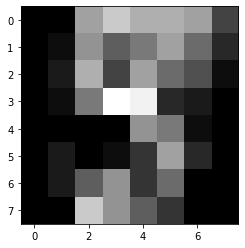

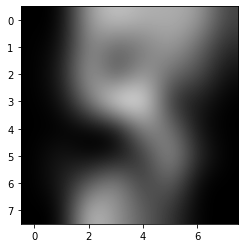

image #7


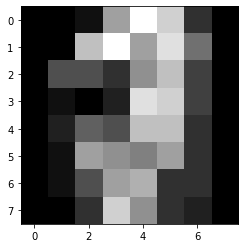

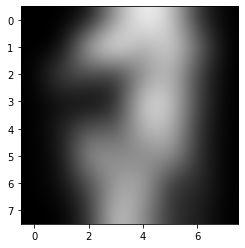

image #8


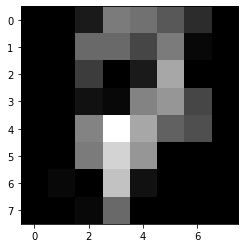

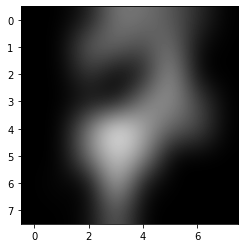

In [37]:
number_of_images = 8
for i in range(number_of_images):
    image2 = image_generator(mu_qda, covmat_qda, value2)
    print("image #" + str(i+1))
    show1(image2)
    show2(image2)

# Por alguna razon no funciona esta verga

In [38]:
def create_images(number1,number2, first = True,interpolation = "bicubic"): #interpolation = "nearest" or interpolation = "bicubic"
    X_train, y_train = Choose_two_values(number1, number2)
    mu, covmat,p = fit_qda(X_train, y_train, number1 ,number2)
    number_of_images = 8
    value = number2
    if first:
        value= number1
    print("Images of number "+str(value))
    for i in range(number_of_images):
        image3 = image_generator(mu, covmat, value)
        print("image #" + str(i+1))
        assert 2 == len(image3.shape)
        plt.figure()
        plt.gray()
        plt.imshow(image3 , interpolation = interpolation) # also try interpolation =" bicubic "
        plt.show()
    

Images of number 0
image #1


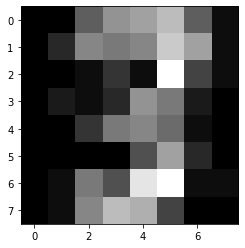

image #2


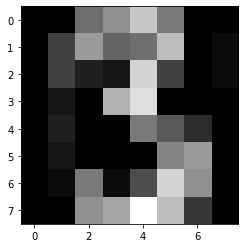

image #3


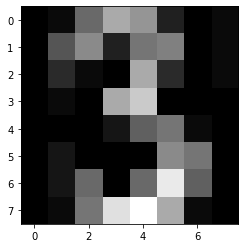

image #4


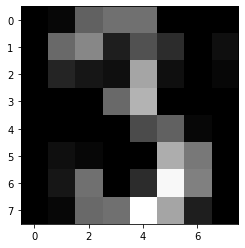

image #5


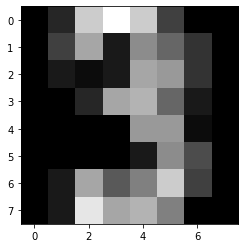

image #6


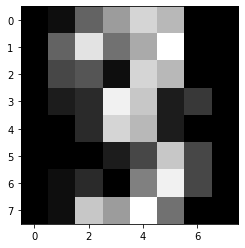

image #7


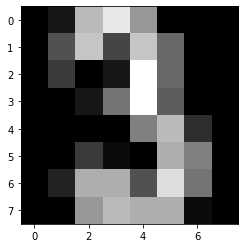

image #8


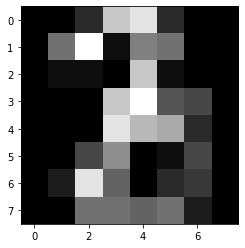

In [39]:
create_images(0,7, first= True, interpolation ="nearest" )